### Importing Necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Data Processing

In [2]:
def dataframe_from_txt_data(data_path,data_kind):
    """This function will take the path directory where train and test data is kept in your local directory
     and the kind of data in string format such as 'train' or 'test' and returns a dataframe"""
     
    #creating empty list to store the values for different text files    
    lst_ID = []
    lst_Delivery_person_ID = []
    lst_Delivery_person_Age = []
    lst_Delivery_person_Ratings = []
    lst_Restaurant_latitude = []
    lst_Restaurant_longitude = []
    lst_Delivery_location_latitude = []
    lst_Delivery_location_longitude = []
    lst_Order_Date = []
    lst_Time_Orderd = []
    lst_Time_Order_picked = []
    lst_Weather = []
    lst_Road_traffic_density = []
    lst_Vehicle_condition = []
    lst_Type_of_order = []
    lst_Type_of_vehicle = []
    lst_multiple_deliveries = []
    lst_Festival = []
    lst_City = []
    lst_Time_taken = []
    
    #conditional statement to set the index based on data kind
    if data_kind == 'train':
        index = range(45593)
    elif data_kind == 'test':
        index = np.arange(45593,56992,1)
    
    #looping over all txt files, reading it and extracting the info in a list
    for i in index:
        file = open(data_path  + str(i) + '.txt')
        lines = file.readlines()

        lst=[]
        for line in lines:
            line=line.strip()
            pattern = re.compile(r'\s+')
            sentence = re.sub(pattern, ',', line)
    #         print(sentence.split(',', 1))
            lst = lst + sentence.split(',', 1)

        lst_ID.append(lst[1])
        lst_Delivery_person_ID.append(lst[3])
        lst_Delivery_person_Age.append(lst[5])
        lst_Delivery_person_Ratings.append(lst[7])
        lst_Restaurant_latitude.append(lst[9])
        lst_Restaurant_longitude.append(lst[11])
        lst_Delivery_location_latitude.append(lst[13])
        lst_Delivery_location_longitude.append(lst[15])
        lst_Order_Date.append(lst[17])
        lst_Time_Orderd.append(lst[19])
        lst_Time_Order_picked.append(lst[21])
        lst_Weather.append(lst[23])
        lst_Road_traffic_density.append(lst[25])
        lst_Vehicle_condition.append(lst[27])
        lst_Type_of_order.append(lst[29])
        lst_Type_of_vehicle.append(lst[31])
        lst_multiple_deliveries.append(lst[33])
        lst_Festival.append(lst[35])
        lst_City.append(lst[37])
        lst_Time_taken.append(lst[39])

    #creating the final dataframe from the list obtained
    df  = pd.DataFrame({'ID':lst_ID,
                  'Delivery_person_ID':lst_Delivery_person_ID,
                  'Delivery_person_Age':lst_Delivery_person_Age,
                  'Delivery_person_Ratings':lst_Delivery_person_Ratings,
                  'Restaurant_latitude':lst_Restaurant_latitude,
                  'Restaurant_longitude':lst_Restaurant_longitude,
                  'Delivery_location_latitude':lst_Delivery_location_latitude,
                  'Delivery_location_longitude':lst_Delivery_location_longitude,
                  'Order_Date':lst_Order_Date,
                  'Time_Orderd':lst_Time_Orderd, 
                  'Time_Order_picked':lst_Time_Order_picked,
                  'Weather_conditions':lst_Weather,
                  'Road_traffic_density':lst_Road_traffic_density,
                  'Vehicle_condition':lst_Vehicle_condition,
                  'Type_of_order':lst_Type_of_order,
                  'Type_of_vehicle':lst_Type_of_vehicle,
                  'multiple_deliveries':lst_multiple_deliveries,
                  'Festival':lst_Festival,
                  'City':lst_City,
                  'Time_taken':lst_Time_taken
                 }) 
    
    return df

In [3]:
train_data_path = 'D:/Personal Projects/Amazon_Hackerearth/train/'
test_data_path = 'D:/Personal Projects/Amazon_Hackerearth/test/'

#### Calling function dataframe_from_txt_data 

In [4]:
train = dataframe_from_txt_data(train_data_path,'train')

In [5]:
test =  dataframe_from_txt_data(test_data_path,'test')

In [6]:
id_test = test['ID']

In [7]:
train

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x4607,INDORES13DEL02,37.000000,4.900000,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30,11:45,"conditions,Sunny",High,2,Snack,motorcycle,0.000000,No,Urban,"(min),24.000000"
1,0xb379,BANGRES18DEL02,34.000000,4.500000,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45,19:50,"conditions,Stormy",Jam,2,Snack,scooter,1.000000,No,Metropolitian,"(min),33.000000"
2,0x20f7,BANGRES18DEL01,37.000000,4.400000,12.913041,77.683237,12.953041,77.723237,19-03-2022,13:50,13:55,"conditions,Windy",High,0,Buffet,motorcycle,2.000000,No,Metropolitian,"(min),42.000000"
3,0x7804,HYDRES13DEL02,28.000000,4.900000,17.431477,78.400350,17.451477,78.420350,07-03-2022,10:60,11:15,"conditions,Sandstorms",Low,1,Meal,scooter,1.000000,No,Urban,"(min),19.000000"
4,0x7faf,RANCHIRES07DEL01,37.000000,4.600000,23.359407,85.325055,23.429407,85.395055,18-03-2022,23:50,23:60,"conditions,Stormy",Low,0,Meal,motorcycle,1.000000,No,Metropolitian,"(min),25.000000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0xd82f,AGRRES11DEL02,34.000000,4.900000,27.163303,78.057044,27.213303,78.107044,11-02-2022,18:20,18:25,"conditions,Cloudy",Medium,2,Snack,scooter,0.000000,No,Metropolitian,"(min),19.000000"
45589,0x98f6,PUNERES18DEL03,20.000000,4.800000,18.593481,73.785901,18.653481,73.845901,05-04-2022,17:60,18:05,"conditions,Sunny",Medium,1,Drinks,motorcycle,1.000000,No,Metropolitian,"(min),14.000000"
45590,0x744,COIMBRES06DEL01,NaN,NaN,11.021278,76.995017,11.061278,77.035017,11-03-2022,NaN,13:10,"conditions,NaN",NaN,3,Snack,electric_scooter,1.000000,No,Metropolitian,"(min),37.000000"
45591,0x419b,JAPRES03DEL03,23.000000,4.900000,26.913483,75.803139,27.053483,75.943139,25-03-2022,19:50,19:60,"conditions,Cloudy",Jam,2,Meal,motorcycle,1.000000,No,Metropolitian,"(min),42.000000"


In [8]:
test

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,"conditions,NaN",NaN,3,Drinks,electric_scooter,1.000000,No,Metropolitian,"0,,dtype:,object"
1,0x3474,BANGRES15DEL01,28.000000,4.600000,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,"conditions,Windy",Jam,0,Snack,motorcycle,1.000000,No,Metropolitian,"1,,dtype:,object"
2,0x9420,JAPRES09DEL03,23.000000,4.500000,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,"conditions,Stormy",Jam,0,Drinks,motorcycle,1.000000,No,Metropolitian,"2,,dtype:,object"
3,0x72ee,JAPRES07DEL03,21.000000,4.800000,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,"conditions,Fog",Medium,1,Meal,scooter,1.000000,No,Metropolitian,"3,,dtype:,object"
4,0xa759,CHENRES19DEL01,31.000000,4.600000,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,"conditions,Sunny",Medium,2,Drinks,scooter,1.000000,No,Metropolitian,"4,,dtype:,object"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35.000000,4.600000,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35,21:45,"conditions,Sunny",Jam,1,Snack,scooter,1.000000,No,Metropolitian,"11394,,dtype:,object"
11395,0x443b,JAPRES11DEL01,33.000000,4.900000,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40,11:45,"conditions,Sandstorms",High,1,Drinks,scooter,1.000000,No,Metropolitian,"11395,,dtype:,object"
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05,"conditions,NaN",NaN,3,Drinks,scooter,1.000000,No,Metropolitian,"11396,,dtype:,object"
11397,0x22d4,VADRES03DEL02,27.00,4.70,22.32,73.17,22.45,73.30,06-03-2022,18:35,18:40,"conditions,Sandstorms",Medium,0,Meal,motorcycle,0.00,No,Metropolitian,"11397,,dtype:,object"


## Feature Engineering

In [9]:
train[['min','Time_Target']] = train['Time_taken'].str.split(',',expand=True)
train[['dump','Weather_conditions']] = train['Weather_conditions'].str.split(',',expand=True)

In [10]:
test[['dump','Weather_conditions']] = test['Weather_conditions'].str.split(',',expand=True)

#### Dropping unnecessary columns

In [11]:
train.drop(['ID', 'Delivery_person_ID','dump','Time_taken', 'min'],axis=1,inplace=True)

In [12]:
test.drop(['ID', 'Delivery_person_ID','dump','Time_taken'],axis=1,inplace=True)

#### Checking the NaN values

In [13]:
train.replace('NaN',np.nan,inplace=True)
test.replace('NaN',np.nan,inplace=True)

In [14]:
train.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_Target                       0
dtype: int64

In [15]:
test.isnull().sum()

Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weather_conditions             158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
dtype: int64

#### checking the datatypes of the columns

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Delivery_person_Age          43739 non-null  object
 1   Delivery_person_Ratings      43685 non-null  object
 2   Restaurant_latitude          45593 non-null  object
 3   Restaurant_longitude         45593 non-null  object
 4   Delivery_location_latitude   45593 non-null  object
 5   Delivery_location_longitude  45593 non-null  object
 6   Order_Date                   45593 non-null  object
 7   Time_Orderd                  43862 non-null  object
 8   Time_Order_picked            45593 non-null  object
 9   Weather_conditions           44977 non-null  object
 10  Road_traffic_density         44992 non-null  object
 11  Vehicle_condition            45593 non-null  object
 12  Type_of_order                45593 non-null  object
 13  Type_of_vehicle              45

#### Correcting the datatype

In [17]:
train['Delivery_person_Age']=train['Delivery_person_Age'].astype('float32')
train['Delivery_person_Ratings']=train['Delivery_person_Ratings'].astype('float32')
train['Restaurant_latitude']=train['Restaurant_latitude'].astype('float32')
train['Restaurant_longitude']=train['Restaurant_longitude'].astype('float32')
train['Delivery_location_latitude']=train['Delivery_location_latitude'].astype('float32')
train['Delivery_location_longitude']=train['Delivery_location_longitude'].astype('float32')
train['Vehicle_condition']=train['Vehicle_condition'].astype('int32')
train['multiple_deliveries']=train['multiple_deliveries'].astype('float32')
train['Time_Target']=train['Time_Target'].astype('float32')

<AxesSubplot:>

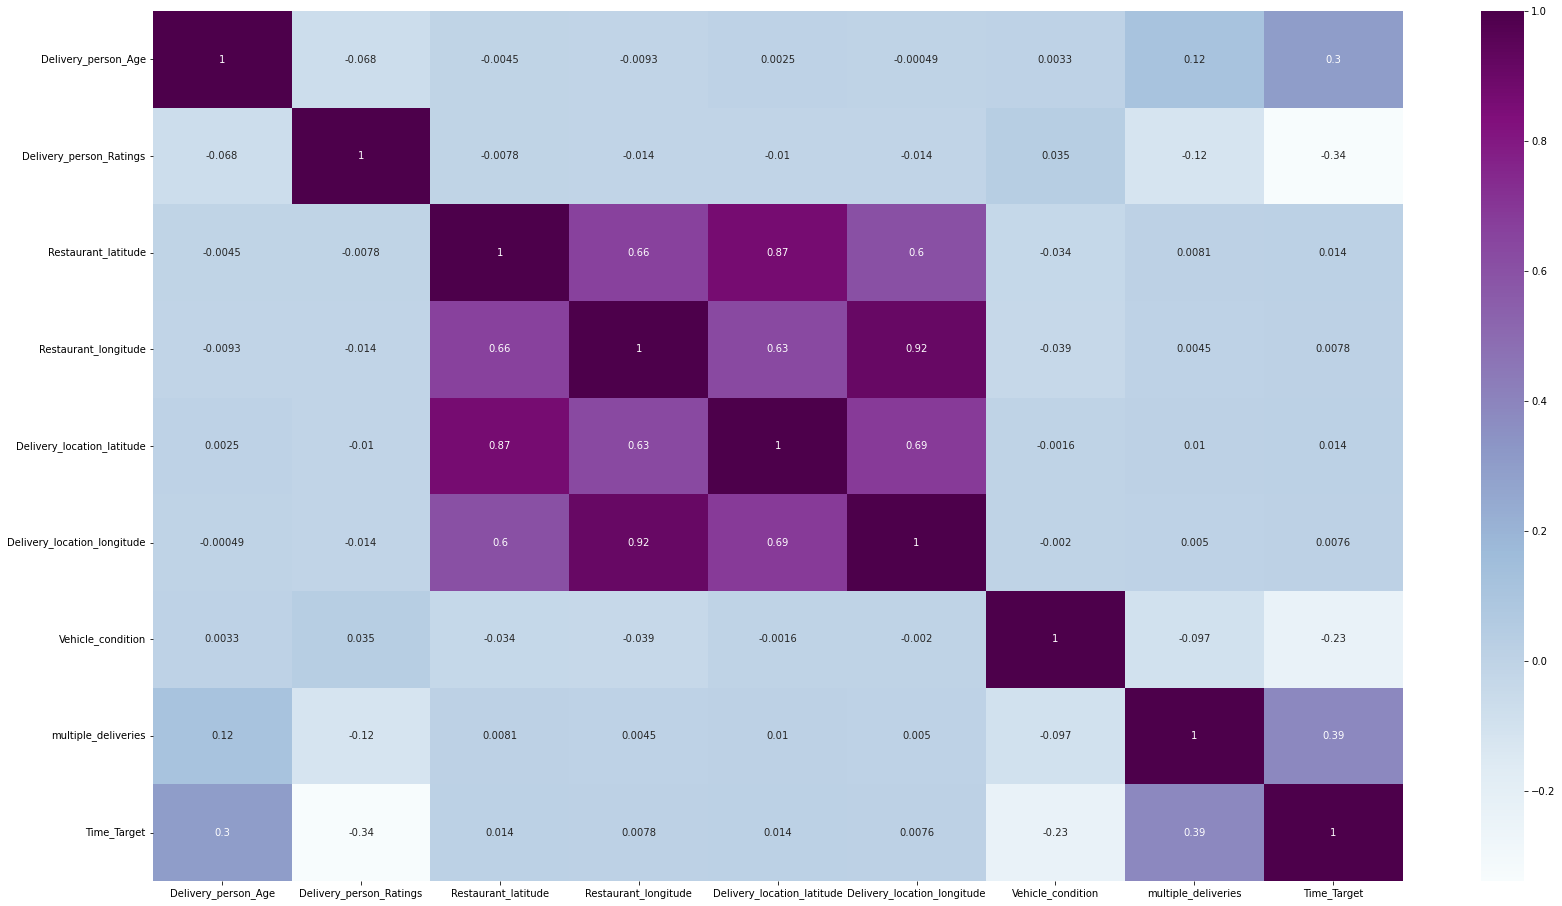

In [18]:
plt.figure(figsize=(28,16))
sns.heatmap(train.corr(),annot=True,cmap="BuPu")

#### Applying One Hot Encoding for the Categorical variables

In [19]:
train = pd.get_dummies(train, columns=['Weather_conditions','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival','City'])

In [20]:
test = pd.get_dummies(test, columns=['Weather_conditions','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival','City'])

In [21]:
train.drop(['Order_Date','Time_Orderd','Time_Order_picked'],axis=1,inplace=True)
test.drop(['Order_Date','Time_Orderd','Time_Order_picked'],axis=1,inplace=True)

#### Creating the inputs and outputs from the train data

In [22]:
y = train['Time_Target']
x = train.drop(['Time_Target'],axis=1)

#### Train test split to Validate the model

In [23]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)

#### Model Fitting

"""Model which is used here is tree based model Xgboost.
The reason for using this because of the null values present in both train and test dataset."""

In [24]:
model = XGBRegressor()

In [27]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Prediction

In [28]:
pred = model.predict(x_val)

#### Model_Evaluation

In [29]:
100*(r2_score(y_val,pred))

77.1324671301737

In [30]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    legend = plt.legend(loc = "upper right",fontsize = "medium")
    plt.xlabel('no. of entries')
    plt.ylabel('Loan sanctitioned USD')
    
    plt.show()
    plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


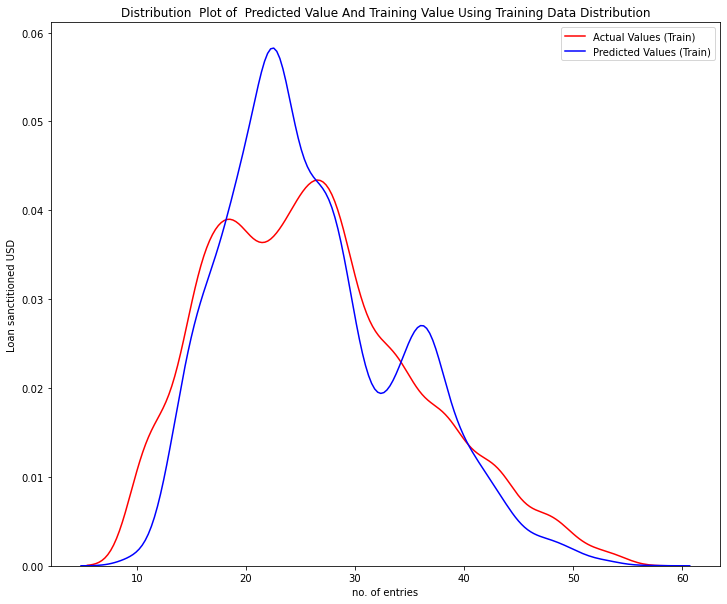

In [31]:
Title = 'Distribution  Plot of  Predicted Value And Training Value Using Training Data Distribution'
DistributionPlot(y_val, pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

#### Submission CSV File

In [32]:
predictions = model.predict(test)

In [100]:
(pd.DataFrame({"ID":id_test,"Time_taken (min)":predictions})).to_csv('submission1.csv',index=False)